<a href="https://colab.research.google.com/github/Atreyee-Paul/Machine-Learning/blob/main/Project5_Customer_Segmentation_and_Purchase_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLUSTERING**

Importing the Dependences

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection and Analysis

In [5]:
# loading data from csv file to Pandas dataframe

customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [6]:
# first five rows in data frame

customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# finding number of rows and columns

customer_data.shape

(200, 5)

In [8]:
# getting some information about the dataset

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# checking for missing values

customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Choosing Annual Income and Spending Score column

In [10]:
X = customer_data.iloc[:, [3,4]].values

In [11]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters

WCSS -> Withing Clusters Sum of Squares

In [12]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

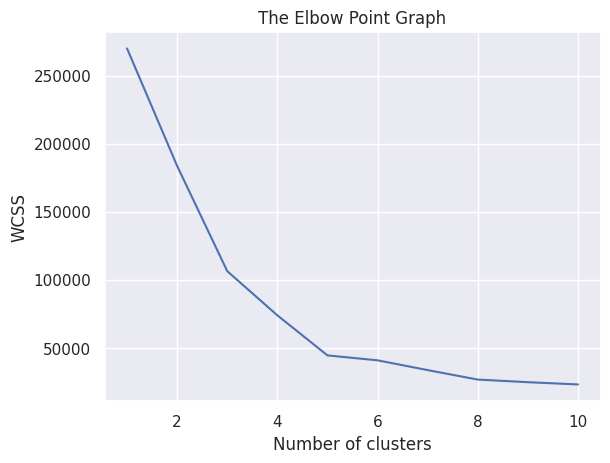

In [13]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of Clusters = 5

Training the k-Means Clustering Model

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Visualizing all the Clusters

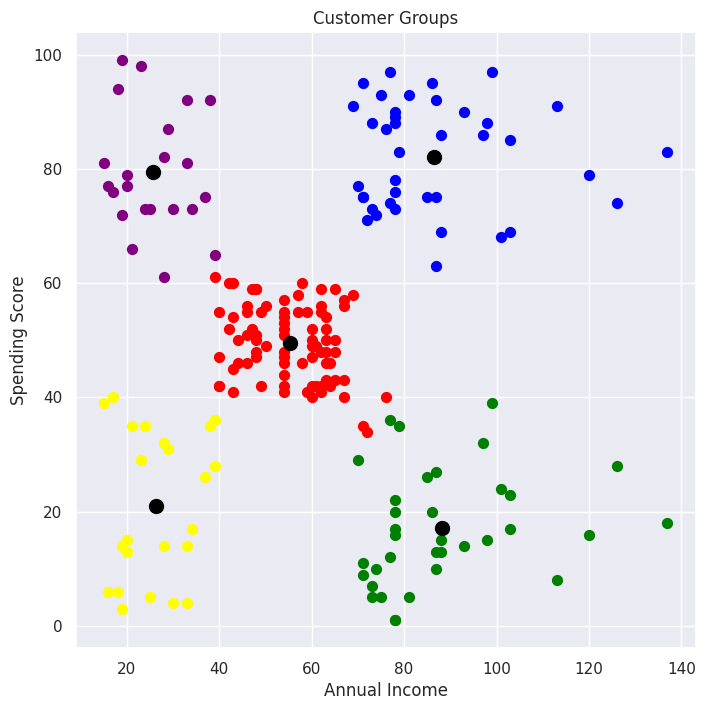

In [17]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='green', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='yellow', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='purple', label='Cluster 5')

# plot the Centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [19]:
# Adding cluster labels to the original dataset
customer_data['Cluster'] = Y

# Analyzing the clusters
cluster_summary = customer_data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        41.114286           88.200000               17.114286
3        45.217391           26.304348               20.913043
4        25.272727           25.727273               79.363636


In [20]:
# Get gender distribution per cluster
gender_counts = customer_data.groupby(['Cluster', 'Gender']).size().unstack()
print(gender_counts)

Gender   Female  Male
Cluster              
0            48    33
1            21    18
2            16    19
3            14     9
4            13     9


## 📊 Final Business Insights from Clusters

- 🔵 **Cluster 1** (High Income, High Spending):  
  Loyal premium buyers — focus on customer retention, loyalty points, early access to new products.

- 🟢 **Cluster 2** (High Income, Low Spending):  
  Price-sensitive despite high income — experiment with limited-time offers or product bundling.

- 🔴 **Cluster 0** (Average Income & Spending):  
  Your “standard” customers — good targets for seasonal campaigns or upselling.

- 🟡 **Cluster 3** (Low Income, Low Spending):  
  Low-value segment — avoid spending much on marketing here.

- 🟣 **Cluster 4** (Low Income, High Spending):  
  Emotion-driven shoppers — use urgency-based marketing like flash sales or discounts.

These segmentation insights can help businesses **tailor marketing strategies**, boost ROI, and improve customer experience.

**PREDICTIVE MODEL CREATION**

Preparing Features and Labels

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Selecting features (X) and target (y)
X = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = customer_data['Cluster']

In [23]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the Model with RandomForestClassifier

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Prediction on test data
y_pred = rf_model.predict(X_test)

Evaluating the Model

In [26]:
# Evaluating accuracy and performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       1.00      1.00      1.00         5
           2       0.91      0.91      0.91        11
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           0.95        40
   macro avg       0.97      0.97      0.97        40
weighted avg       0.95      0.95      0.95        40


Confusion Matrix:
 [[17  0  1  0  0]
 [ 0  5  0  0  0]
 [ 1  0 10  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  3]]


Prediction for new customers

In [29]:
# Taking input from user
print("Enter new customer details:")
age = int(input("Age: "))
income = int(input("Annual Income (k$): "))
spending_score = int(input("Spending Score (1–100): "))

# Creating input for prediction
new_customer = [[age, income, spending_score]]

# Predicting cluster
predicted_cluster = rf_model.predict(new_customer)[0]

cluster_names = {
    0: "🟠 Average earners & spenders",
    1: "🔵 High earners & high spenders (Premium)",
    2: "🟢 High earners but low spenders (Cautious)",
    3: "🟡 Low earners & low spenders (Budget-conscious)",
    4: "🟣 Low earners but high spenders (Impulse-driven)"
}

# result
print(f"\nPredicted Cluster: {predicted_cluster}")
print(f"Customer Segment: {cluster_names[predicted_cluster]}")

Enter new customer details:
Age: 28
Annual Income (k$): 90
Spending Score (1–100): 85

Predicted Cluster: 1
Customer Segment: 🔵 High earners & high spenders (Premium)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
